In [103]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from utils import load_dataset
import time
%matplotlib inline

**This excercise builds a logistic regression classifier to recognize cats. It includes:**

* Initialize Parameters
* Calculating the cost function and its gradient
* Using an optimization algorithm (gradient descent)

*Combine all above functions into a main model*

**Overview of the Problem set**
You are given a dataset ("data.h5") containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

In [104]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()
print("******************************************************************")
print(f"Training Dataset Shape (X) : {train_set_x_orig.shape}")
print(f"Training Dataset Shape (y) : {train_set_y_orig.shape}")
print(f"Test Dataset Shape (X) : {test_set_x_orig.shape}")
print(f"Test Dataset Shape (y) : {test_set_y_orig.shape}")
print("******************************************************************")

******************************************************************
Training Dataset Shape (X) : (209, 64, 64, 3)
Training Dataset Shape (y) : (1, 209)
Test Dataset Shape (X) : (50, 64, 64, 3)
Test Dataset Shape (y) : (1, 50)
******************************************************************


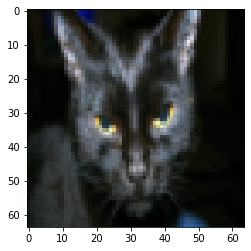

In [95]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])

**Find the values for:**
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)


In [105]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print(f"Training samples : {m_train}, Test Samples : {m_test}, Image size : {num_px} * {num_px} pixels")

Training samples : 209, Test Samples : 50, Image size : 64 * 64 pixels


In [97]:
train_set_x_flatten = train_set_x_orig.reshape(m_train,-1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test,-1).T

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [106]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

**Building the parts of our algorithm**

The main steps for building a Neural Network are:

1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)
    
You often build 1-3 separately and integrate them into one function we call model().

**Formulas**

1. Sigmoid Function: Takes an array/scalar value as input and returns the value(s) between the range or 0 and 1<br>
   > Formula:
     $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$
2. Loss function:<br>     
   > Formula: 
   $Loss(\hat{y}, y) = y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)})$
3. Cost Function:<br>
   > Formula: 
   $J = -\frac{1}{m}\sum_{i=1}^{m}Loss(\hat{y}, y)$<br>
   or<br>
   $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)})$
   

In [140]:
# Helper functions

# Initialize parameters
def init_weights_and_bias_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

def sigmoid(z):
    return 1 /(1 + np.exp(-z))

def calc_loss(Y_hat, y):
    return y * np.log(Y_hat) + (1 - y) * np.log(1 - Y_hat)

def compute_cost(Y_hat, y, m):
    return -(1/m) * np.sum(calc_loss(Y_hat, y))

def compute_activation(w, X, b):
    return sigmoid(np.dot(w.T, X)+b)

def propagate(w, b, X, Y):
    m = X.shape[1]
    Y_hat = compute_activation(w,X,b)
    cost = compute_cost(Y_hat, Y, m)
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m) * np.dot(X, (Y_hat - Y).T)
    db = (1/m) * np.sum(Y_hat - Y)
    grads = {
        "dw" : dw,
        "db" : db
    }
    return  cost, grads

def optimize():
    pass

In [141]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
propagate(w, b, X, Y)
# A = sigmoid(np.dot(w.T, X)+b)
# print(compute_activation(w,X,b))
# print(A)

# # print(calc_cost(A,Y,m))

# print(A)
# m = X.shape[1]
# cost = - (1/m) * np.sum(calc_loss(A,Y))
# cost1 = -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) 
# print(cost)
# print(cost1)
# print(compute_cost(A,Y,m))

(5.801545319394553,
 {'dw': array([[0.99845601],
         [2.39507239]]), 'db': 0.001455578136784208})

In [119]:
# Test sigmoid, output must be array([0.5       , 0.88079708])
s = sigmoid(np.array([[0,2]]))
assert(s.shape == (1, 2))
assert(s[0,0] == 0.5)
assert(s[0,1] == 0.8807970779778823)



0.8807970779778823